In [1]:
import numpy as np
import librosa
import cv2
import os
import tensorflow as tf

In [2]:
# Paths to the RAVDESS dataset folders
audio_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO"
video_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO"

In [3]:
# Function to list files in a directory
def list_files(directory):
    files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    return files_list

In [4]:
# List audio files
audio_files = list_files(audio_dir)
print("Audio Files:")
for audio_file in audio_files:
    print(audio_file)

Audio Files:
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-02-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-02-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-01-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-01-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-02-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-02-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-02-01-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-02-01-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-02-02-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-0

In [5]:
# List video files
video_files = list_files(video_dir)
print("\nVideo Files:")
for video_file in video_files:
    print(video_file)


Video Files:
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-01-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-01-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-02-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-02-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-01-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-01-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-02-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-02-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-02-01-01-01.mp4
C:\Users\1201101209\Desktop\RAVD

In [6]:
# Ensure audio and video files are sorted in the same order
audio_files.sort()
video_files.sort()

In [7]:
print("Total number of audio files:", len(audio_files))
print("Total number of video files:", len(video_files))

Total number of audio files: 1440
Total number of video files: 1440


In [8]:
import os
import pandas as pd

# Paths to the RAVDESS dataset folders
audio_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO"
video_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO"

# Function to extract emotion label from file name
def extract_emotion_label(file_name):
    # Extract emotion label from file name
    emotion_code = int(file_name.split('-')[2])
    emotion_mapping = {
        1: 'neutral',
        2: 'calm',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fearful',
        7: 'disgusted',
        8: 'surprised'
    }
    return emotion_mapping.get(emotion_code, 'unknown')

# Function to extract actor ID from file name
def extract_actor_id(file_name):
    return file_name.split('-')[6]

# Function to label audio files with emotion labels and actor IDs
def label_audio_files(audio_file_paths):
    labeled_data = []
    for file_path in audio_file_paths:
        file_name = os.path.basename(file_path)
        emotion_label = extract_emotion_label(file_name)
        actor_id = extract_actor_id(file_name)
        labeled_data.append({'File': file_name, 'Emotion': emotion_label, 'Actor_ID': actor_id})
    return labeled_data

# Function to label video files with emotion labels and actor IDs
def label_video_files(video_file_paths):
    labeled_data = []
    for file_path in video_file_paths:
        file_name = os.path.basename(file_path)
        emotion_label = extract_emotion_label(file_name)
        actor_id = extract_actor_id(file_name)
        labeled_data.append({'File': file_name, 'Emotion': emotion_label, 'Actor_ID': actor_id})
    return labeled_data

# Function to list files in a directory
def list_files(directory):
    files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    return files_list

# List audio files
audio_files = list_files(audio_dir)

# List video files
video_files = list_files(video_dir)

# Label the audio and video files
labeled_audio_data = label_audio_files(audio_files)
labeled_video_data = label_video_files(video_files)

# Convert labeled data to pandas DataFrame
audio_df = pd.DataFrame(labeled_audio_data)
video_df = pd.DataFrame(labeled_video_data)

# Display the labeled data in tabular form
print("Labeled Audio Files:")
print(audio_df)

print("\nLabeled Video Files:")
print(video_df)


Labeled Audio Files:
                          File    Emotion Actor_ID
0     03-01-01-01-01-01-01.wav    neutral   01.wav
1     03-01-01-01-01-02-01.wav    neutral   01.wav
2     03-01-01-01-02-01-01.wav    neutral   01.wav
3     03-01-01-01-02-02-01.wav    neutral   01.wav
4     03-01-02-01-01-01-01.wav       calm   01.wav
...                        ...        ...      ...
1435  03-01-08-01-02-02-24.wav  surprised   24.wav
1436  03-01-08-02-01-01-24.wav  surprised   24.wav
1437  03-01-08-02-01-02-24.wav  surprised   24.wav
1438  03-01-08-02-02-01-24.wav  surprised   24.wav
1439  03-01-08-02-02-02-24.wav  surprised   24.wav

[1440 rows x 3 columns]

Labeled Video Files:
                          File    Emotion Actor_ID
0     01-01-01-01-01-01-01.mp4    neutral   01.mp4
1     01-01-01-01-01-02-01.mp4    neutral   01.mp4
2     01-01-01-01-02-01-01.mp4    neutral   01.mp4
3     01-01-01-01-02-02-01.mp4    neutral   01.mp4
4     01-01-02-01-01-01-01.mp4       calm   01.mp4
...           

In [9]:
#Function to extract MFCC 
def extract_mfcc(audio_path, num_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)  # Load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)  # Extract MFCC
    return mfcc

In [10]:
# Preprocessing audio files
max_length = 1000  # Set the maximum length of MFCC features (adjust as needed)
audio_features = []

for audio_file in audio_files:
    mfcc = extract_mfcc(audio_file)
    # Pad or truncate the MFCC features to ensure they all have the same length
    if mfcc.shape[1] < max_length:
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
        audio_features.append(mfcc_padded)
    elif mfcc.shape[1] > max_length:
        mfcc_truncated = mfcc[:, :max_length]
        audio_features.append(mfcc_truncated)
    else:
        audio_features.append(mfcc)

In [11]:
# Convert the list of MFCC features to a numpy array
audio_features = np.array(audio_features)

In [12]:
# Reshape the audio_features to 2D for scaling (samples, features)
n_samples, n_mfcc, n_frames = audio_features.shape
audio_features_2d = audio_features.reshape(n_samples, -1)

In [13]:
from sklearn.preprocessing import StandardScaler
# Normalize the MFCC features
scaler = StandardScaler()
audio_features_normalized_2d = scaler.fit_transform(audio_features_2d)

# Reshape back to original shape (samples, n_mfcc, n_frames)
audio_features_normalized = audio_features_normalized_2d.reshape(n_samples, n_mfcc, n_frames)


In [14]:
print(audio_features_normalized.shape)

(1440, 13, 1000)


In [15]:
# Path to the audio file
audio_path = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-01-01.wav"
y, sr = librosa.load(audio_path, sr=None)

In [16]:
pip install --upgrade librosa matplotlib

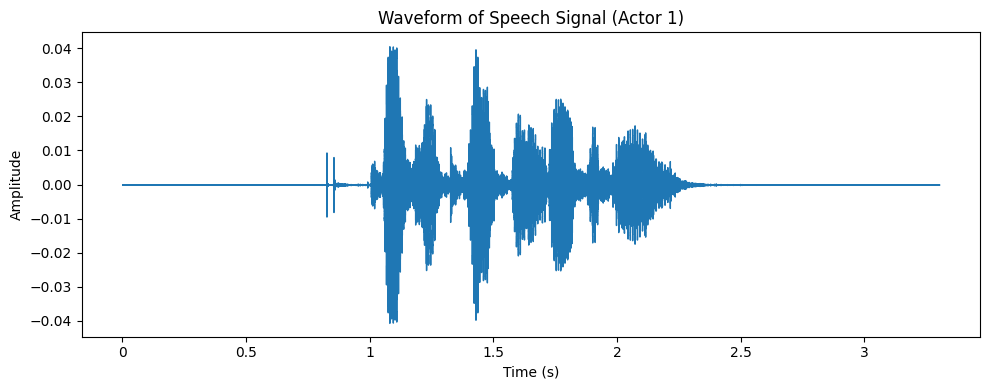

In [17]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Speech Signal (Actor 1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_mfcc(audio_path, num_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)  # Load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)  # Extract MFCC
    return mfcc, sr

# Path to the audio file
audio_path = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-01-01.wav"

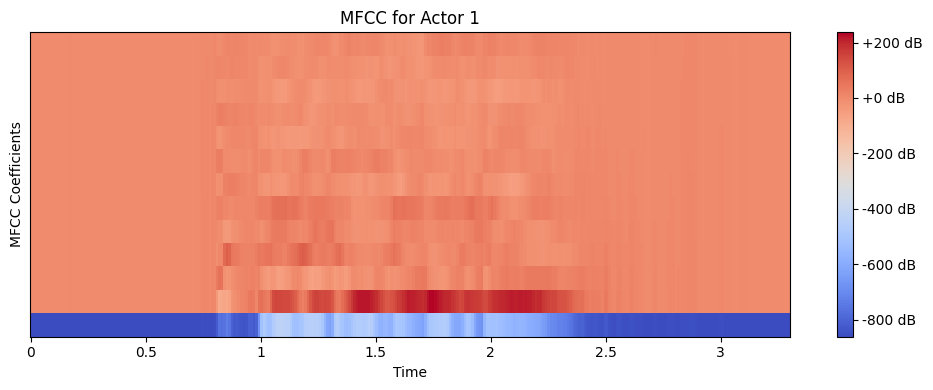

In [19]:
# Extract MFCC features
mfcc, sr = extract_mfcc(audio_path)

# Display the MFCC features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for Actor 1')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [20]:
import keras

In [21]:
from keras.applications.efficientnet import EfficientNetB0, preprocess_input

In [22]:
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
import cv2
import numpy as np

# Define the ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_video_features(video_files, model, target_resolution=(224, 224), batch_size=32):
    video_features = []
    for i in range(0, len(video_files), batch_size):
        batch_video_files = video_files[i:i+batch_size]
        batch_videos = []
        for video_file in batch_video_files:
            cap = cv2.VideoCapture(video_file)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            features = []
            for _ in range(frame_count):
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, target_resolution)  # Resize frame to target resolution
                frame = preprocess_input(frame)  # Preprocess frame
                batch_videos.append(frame)
            cap.release()
        batch_videos = np.array(batch_videos)
        batch_features = model.predict(batch_videos)
        video_features.extend(batch_features)
    return video_features

# Define the target resolution (e.g., 224x224)
target_resolution = (224, 224)

# Define batch size
batch_size = 32

# Extract video features using ResNet50
video_features_resnet = extract_video_features(video_files, resnet_model, target_resolution, batch_size)

109/109 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 119s 

In [23]:
# Convert the video features to a numpy array
video_features = np.array(video_features_resnet)

In [24]:
# Ensure that the video features array has the correct shape
print("Shape of video features:", video_features.shape)
print("Shape of audio features:", audio_features.shape)

Shape of video features: (159222, 2048)
Shape of audio features: (1440, 13, 1000)


In [25]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
pca = PCA(n_components=1280)

# Fit PCA on the original video features
video_features_pca = pca.fit_transform(video_features)

# Check the shape of the transformed video features
print("Shape of transformed video features:", video_features_pca.shape)

Shape of transformed video features: (159222, 1280)


In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert list of video features to numpy array
video_features_np = np.array(video_features_resnet)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape the features to fit the scaler's input shape
video_features_reshaped = video_features_pca.reshape(-1, 1280)

# Normalize the features
normalized_video_features = scaler.fit_transform(video_features_reshaped)

# Reshape the normalized features back to the original shape
normalized_video_features = normalized_video_features.reshape(video_features_pca.shape)

#Print shape of normalized features
print("Shape of normalized video features:", normalized_video_features.shape)

Shape of normalized video features: (159222, 1280)


In [27]:
print("Shape of normalized audio features", audio_features_normalized.shape)
print("Shape of normalized video features:", normalized_video_features.shape)

Shape of normalized audio features (1440, 13, 1000)
Shape of normalized video features: (159222, 1280)


In [28]:
# Truncate or pad the audio features to ensure the number of samples match
num_samples = min(audio_features_normalized.shape[0], normalized_video_features.shape[0])
audio_features_normalized = audio_features_normalized[:num_samples]
normalized_video_features = normalized_video_features[:num_samples]

# Flatten the audio features to match the dimension for concatenation
audio_features_flat = audio_features_normalized.reshape(num_samples, -1)

# Concatenate the audio and video features
combined_features = np.concatenate((audio_features_flat, normalized_video_features), axis=1)
print("Shape of combined features:", combined_features.shape)

Shape of combined features: (1440, 14280)


In [29]:
# Reshape for CNN input (batch_size, height, width, channels)
combined_features_reshaped = combined_features.reshape((num_samples, 1, combined_features.shape[1], 1))
print("Shape of reshaped combined features:", combined_features_reshaped.shape)

# Define input shape for the CNN
input_shape = (1, combined_features.shape[1], 1)

Shape of reshaped combined features: (1440, 1, 14280, 1)


In [90]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

emotion_mapping = {
    'neutral': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4, 
    'fearful': 5, 'disgusted': 6, 'surprised': 7
}

labels = [emotion_mapping[emotion] for emotion in audio_df['Emotion'][:num_samples]]
labels = to_categorical(labels, num_classes=8)
X_train, X_val, y_train, y_val = train_test_split(combined_features_reshaped, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (1152, 1, 14280, 1) (1152, 8)
Validation set shape: (288, 1, 14280, 1) (288, 8)


2D CNN

In [91]:
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(1, 3), activation='relu', input_shape=input_shape, padding='same'),
        Conv2D(32, kernel_size=(1, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(1, 2)),
        Conv2D(64, kernel_size=(1, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(1, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(1, 2)),
        Conv2D(128, kernel_size=(1, 3), activation='relu', padding='same'),
        Conv2D(128, kernel_size=(1, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(1, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')  # Assuming 8 emotion classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [92]:
from keras.callbacks import EarlyStopping
input_shape = X_train.shape[1:]  # Get the input shape
model = create_cnn_model(input_shape)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.1666 - loss: 2.2130 - val_accuracy: 0.3958 - val_loss: 1.6253
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4291 - loss: 1.6303 - val_accuracy: 0.5347 - val_loss: 1.2781
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5835 - loss: 1.1748 - val_accuracy: 0.5451 - val_loss: 1.2320
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6569 - loss: 0.9381 - val_accuracy: 0.6250 - val_loss: 1.1593
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7830 - loss: 0.6411 - val_accuracy: 0.6250 - val_loss: 1.0980
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8854 - loss: 0.3531 - val_accuracy: 0.6076 - val_loss: 1.3058
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9088 - loss: 0.2620 - val_accuracy: 0.6424 - val_loss: 1.4315
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9339 - loss: 0.2017 - val_accuracy: 0.6111 - val_loss:

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds
num_folds = 10

# Create KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect results
fold_no = 1
accuracies = []
losses = []

for train_index, val_index in kf.split(combined_features_reshaped):
    print(f"Training fold {fold_no}...")

    # Split the data
    X_train, X_val = combined_features_reshaped[train_index], combined_features_reshaped[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Reshape the input data to match the input shape required by the model
    input_shape = X_train.shape[1:]  # Get the input shape

    # Create the model
    model = create_cnn_model(input_shape)

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f"Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%")

    # Save accuracy and loss for this fold
    accuracies.append(scores[1] * 100)
    losses.append(scores[0])

    fold_no += 1

Training fold 1...
Score for fold 1: compile_metrics of 65.97222089767456%
Training fold 2...
Score for fold 2: compile_metrics of 58.33333134651184%
Training fold 3...
Score for fold 3: compile_metrics of 70.13888955116272%
Training fold 4...
Score for fold 4: compile_metrics of 61.80555820465088%
Training fold 5...
Score for fold 5: compile_metrics of 68.05555820465088%
Training fold 6...
Score for fold 6: compile_metrics of 66.66666865348816%
Training fold 7...
Score for fold 7: compile_metrics of 63.88888955116272%
Training fold 8...
Score for fold 8: compile_metrics of 61.11111044883728%
Training fold 9...
Score for fold 9: compile_metrics of 63.88888955116272%
Training fold 10...
Score for fold 10: compile_metrics of 56.94444179534912%


In [37]:
# Calculate average accuracy and loss
print(f"Average accuracy: {np.mean(accuracies)}%")
print(f"Average loss: {np.mean(losses)}")

Average accuracy: 63.68055582046509%
Average loss: 1.7557459592819213


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


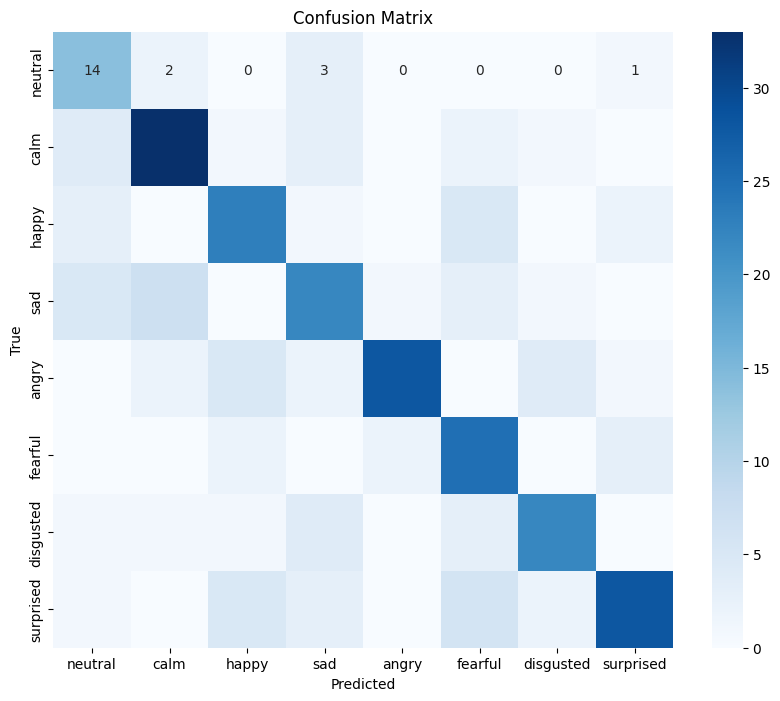

              precision    recall  f1-score   support

     neutral       0.50      0.70      0.58        20
        calm       0.73      0.75      0.74        44
       happy       0.62      0.68      0.65        34
         sad       0.58      0.56      0.57        39
       angry       0.90      0.67      0.77        42
     fearful       0.57      0.78      0.66        32
   disgusted       0.73      0.69      0.71        32
   surprised       0.80      0.62      0.70        45

    accuracy                           0.68       288
   macro avg       0.68      0.68      0.67       288
weighted avg       0.70      0.68      0.68       288



In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming your model is already trained and named 'model'

# Step 1: Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Step 2: Convert predictions from one-hot encoding to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Step 4: Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_mapping.keys(), yticklabels=emotion_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=emotion_mapping.keys()))


AlexNet

In [94]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import KFold
import numpy as np

In [95]:
emotion_mapping = {
    'neutral': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4, 
    'fearful': 5, 'disgusted': 6, 'surprised': 7
}
labels = [emotion_mapping[emotion] for emotion in audio_df['Emotion'][:num_samples]]
labels = to_categorical(labels, num_classes=8)


In [96]:
# Reshape to (119, 120, 1)
new_shape = (119, 120, 1)
X_train_reshaped = X_train.reshape(-1, *new_shape)
X_val_reshaped = X_val.reshape(-1, *new_shape)

In [97]:
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(1152, 119, 120, 1)
(288, 119, 120, 1)


In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split


In [99]:
def create_alexnet(input_shape):
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')  # Assuming 8 emotion classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [100]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

In [101]:
# Reshape to (119, 120, 1)
new_shape = (119, 120, 1)
X_train_reshaped = X_train.reshape(-1, *new_shape)
X_val_reshaped = X_val.reshape(-1, *new_shape)

print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(1152, 119, 120, 1)
(288, 119, 120, 1)


In [102]:
# Define input shape
input_shape = new_shape

# Create the AlexNet model
alexnet_model = create_alexnet(input_shape)


C:\Users\1201101209\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
# Train the AlexNet model
alexnet_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val), verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 351ms/step - accuracy: 0.1428 - loss: 2.1788 - val_accuracy: 0.1146 - val_loss: 2.0442
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 340ms/step - accuracy: 0.1403 - loss: 2.0438 - val_accuracy: 0.1319 - val_loss: 2.0058
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 341ms/step - accuracy: 0.1828 - loss: 1.9943 - val_accuracy: 0.2535 - val_loss: 1.8998
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.2253 - loss: 1.9436 - val_accuracy: 0.2639 - val_loss: 1.9329
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.2504 - loss: 1.8888 - val_accuracy: 0.3229 - val_loss: 1.7481
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 345ms/step - accuracy: 0.3096 - loss: 1.7454 - val_accuracy: 0.3542 - val_loss: 1.6446
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 345ms/step - accuracy: 0.3741 - loss: 1.5532 - val_accuracy: 0.3368 - val_loss: 1.6162
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 343ms/step - accuracy: 0.4076 - loss: 1.5460 - val_accu

In [105]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val_reshaped)

# Convert predictions and true labels from one-hot encoding to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Print the classification report
report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=emotion_mapping.keys())
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
              precision    recall  f1-score   support

     neutral       0.48      0.70      0.57        20
        calm       0.74      0.66      0.70        44
       happy       0.57      0.71      0.63        34
         sad       0.55      0.56      0.56        39
       angry       0.87      0.64      0.74        42
     fearful       0.55      0.69      0.61        32
   disgusted       0.68      0.66      0.67        32
   surprised       0.78      0.62      0.69        45

    accuracy                           0.65       288
   macro avg       0.65      0.65      0.65       288
weighted avg       0.67      0.65      0.65       288



DenseNet

In [106]:
# Reshape for CNN input (batch_size, height, width, channels)
combined_features_reshaped = combined_features.reshape((num_samples, 1, combined_features.shape[1], 1))
print("Shape of reshaped combined features:", combined_features_reshaped.shape)

# Define input shape for the CNN
input_shape = (1, combined_features.shape[1], 1)

Shape of reshaped combined features: (1440, 1, 14280, 1)


In [107]:
# Example reshape, ensure 14280 can be reshaped to 119 * 120.
combined_features_reshaped = combined_features.reshape(-1, 119, 120, 1)
# Convert single channel to 3 channels by replicating the same channel.
combined_features_rgb = np.repeat(combined_features_reshaped, 3, axis=-1)

In [108]:
# Convert labels to one-hot encoding
labels_categorical = to_categorical(labels, num_classes=8)

In [109]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

emotion_mapping = {
    'neutral': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4, 
    'fearful': 5, 'disgusted': 6, 'surprised': 7
}

labels = [emotion_mapping[emotion] for emotion in audio_df['Emotion'][:num_samples]]
labels = to_categorical(labels, num_classes=8)
X_train, X_val, y_train, y_val = train_test_split(combined_features_rgb, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (1152, 119, 120, 3) (1152, 8)
Validation set shape: (288, 119, 120, 3) (288, 8)


In [110]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

def create_densenet(input_shape):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(8, activation='softmax')(x)  # Assuming 8 emotion classes
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [112]:
# Create the DenseNet model
densenet_model = create_densenet((119, 120, 3))

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the DenseNet model
history = densenet_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.1304 - loss: 13.0428 - val_accuracy: 0.1076 - val_loss: 11.7498
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.2192 - loss: 11.7568 - val_accuracy: 0.1667 - val_loss: 11.1563
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2127 - loss: 11.0573 - val_accuracy: 0.2014 - val_loss: 10.6107
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.2887 - loss: 10.3937 - val_accuracy: 0.2500 - val_loss: 10.0817
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.3415 - loss: 9.8032 - val_accuracy: 0.3299 - val_loss: 9.6109
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.3803 - loss: 9.3559 - val_accuracy: 0.3368 - val_loss: 9.2087
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.4718 - loss: 8.8119 - val_accuracy: 0.3438 - val_loss: 8.8683
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5102 - loss: 8.3616 - val_accuracy: 0.3542 - 

In [115]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the validation set
y_val_pred = densenet_model.predict(X_val)

# Convert predictions and true labels from one-hot encoding to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Print the classification report
report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=emotion_mapping.keys())
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step
              precision    recall  f1-score   support

     neutral       0.36      0.25      0.29        20
        calm       0.64      0.61      0.63        44
       happy       0.36      0.47      0.41        34
         sad       0.35      0.23      0.28        39
       angry       0.75      0.50      0.60        42
     fearful       0.42      0.47      0.44        32
   disgusted       0.32      0.50      0.39        32
   surprised       0.42      0.44      0.43        45

    accuracy                           0.45       288
   macro avg       0.45      0.43      0.43       288
weighted avg       0.47      0.45      0.45       288

